In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load the dataset
boston = datasets.fetch_california_housing()
X_reg, y_reg = boston.data, boston.target  # Features and target

In [3]:
# Split into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [4]:
# SVM Regression Without Scaling 
svm_reg_no_scaling = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svm_reg_no_scaling.fit(X_train_reg, y_train_reg)
y_pred_reg_no_scaling = svm_reg_no_scaling.predict(X_test_reg)

mse_no_scaling = mean_squared_error(y_test_reg, y_pred_reg_no_scaling)
r2_no_scaling = r2_score(y_test_reg, y_pred_reg_no_scaling)

In [5]:
# SVM Regression With Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [6]:
# Fit & transform X and y
X_train_reg_scaled = scaler_X.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_X.transform(X_test_reg)
y_train_reg_scaled = scaler_y.fit_transform(y_train_reg.reshape(-1, 1)).ravel()

In [7]:
# Train SVR on scaled data
svm_reg_scaled = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svm_reg_scaled.fit(X_train_reg_scaled, y_train_reg_scaled)

SVR(C=100)

In [8]:
# Predict and inverse transform
y_pred_reg_scaled = svm_reg_scaled.predict(X_test_reg_scaled).reshape(-1, 1)
y_pred_reg_original = scaler_y.inverse_transform(y_pred_reg_scaled)

mse_scaled = mean_squared_error(y_test_reg, y_pred_reg_original)
r2_scaled = r2_score(y_test_reg, y_pred_reg_original)

print("SVM Regression Results (California Housing Dataset):")
print(f"   - MSE WITHOUT Scaling: {mse_no_scaling:.2f}, R²: {r2_no_scaling:.2f}")
print(f"   - MSE WITH Scaling: {mse_scaled:.2f}, R²: {r2_scaled:.2f}")

SVM Regression Results (California Housing Dataset):
   - MSE WITHOUT Scaling: 0.66, R²: 0.50
   - MSE WITH Scaling: 0.32, R²: 0.76


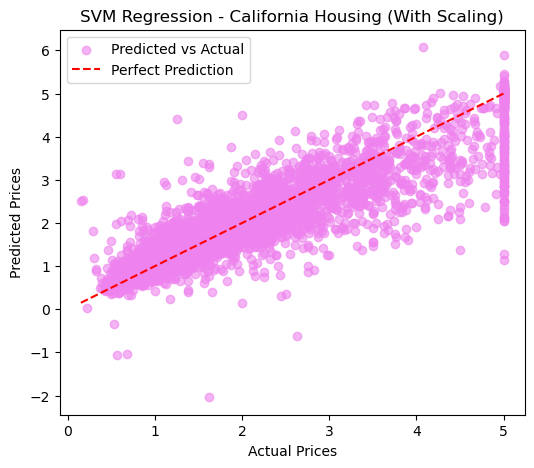

In [16]:
# Scatter plot of actual vs predicted values (Scaled Model)
plt.figure(figsize=(6, 5))
plt.scatter(y_test_reg, y_pred_reg_original, color='violet', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVM Regression - California Housing (With Scaling)")
plt.legend()
plt.show()

In [10]:
# Predict on New Data and Inverse Transform 
new_data = [[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]]

In [11]:
# Scale the new data
new_data_scaled = scaler_X.transform(new_data)

In [12]:
# Predict the scaled price
predicted_price_scaled = svm_reg_scaled.predict(new_data_scaled).reshape(-1, 1)

In [13]:
# Inverse transform to get the actual price
predicted_price_original = scaler_y.inverse_transform(predicted_price_scaled)

In [14]:
# Print results
print(f"Predicted House Price (Scaled): {predicted_price_scaled[0][0]:.2f}")
print(f"Predicted House Price (Original Scale): ${predicted_price_original[0][0] * 100000:.2f}")

Predicted House Price (Scaled): 1.82
Predicted House Price (Original Scale): $417696.46
